In [4]:
import requests
import random


url = "https://hackathon-products-api.apps.01.cf.eu01.stackit.cloud/api/articles"
response = requests.get(url)
data = response.json()
import pandas as pd
df = pd.DataFrame(data)
df['expiresAt'] = pd.to_datetime(df['expiresAt'])
import datetime
df['manufacture_date'] = pd.Timestamp.now()
df['date_diff'] = df['expiresAt'] - df['manufacture_date']
df['expire_in'] = df['date_diff'].dt.days
def handle_threshold_for_expiry(date):
    if date < 20:
        return 'c1'
    elif date > 20 and date < 100:
        return 'c2'

    elif date > 100 and date < 150:
        return 'c3'
    
    elif date > 150 and date < 225:
        return 'c4'
    else:
        return 'c5'
    
df['demand'] = df['available'].apply(lambda x:   int(x *  random.uniform(0.8, 1.2))  )
df['store_id'] =  1

import random
import pandas as pd

# Initialize a list to store all new records
all_new_data = []

# Loop over the store IDs
for store in [2, 3, 4, 5]:
    # Loop over each unique 'id'
    for each in df['id'].unique():
        # Select the record where 'id' matches
        record_value = df[df['id'] == each].copy() 
        
        random_available = random.uniform(0, 1.3)
        random_demand = random.uniform(0.8, 1.2)
        new_available = int(record_value['available'].values[0] * random_available)  
        demand = int(record_value['available'].values[0] * random_demand)  
        
        # Update 'available' and 'store_id' values
        record_value['available'] = new_available
        record_value['store_id'] = store
        record_value['demand']  = demand
        
        # Append the modified record to the list
        all_new_data.append(record_value)

# Concatenate all new records into a single DataFrame
new_df = pd.concat(all_new_data, ignore_index=True)

# Optionally, combine the original df with the new_df
final_df = pd.concat([df, new_df], ignore_index=True)

print(final_df)


           id                         name  expiresAt  price weight  \
0     8376291      Organic Cherry Tomatoes 2024-09-23   2.99   250g   
1     5728364               Sweet Potatoes 2024-10-15   1.79    1kg   
2     9126483             Broccoli Florets 2024-09-18   2.49   400g   
3     4537281             Red Bell Peppers 2024-12-02   1.29   500g   
4     1928374                 Baby Spinach 2024-09-27   3.99   150g   
...       ...                          ...        ...    ...    ...   
1760  1728391       Mung Beans, Whole, 1kg 2025-01-14   4.99    1kg   
1761  6283742      Fava Beans, Dried, 250g 2024-11-09   2.29   250g   
1762  3847292  Adzuki Beans, Organic, 500g 2025-04-22   3.79   500g   
1763  5928372        Soybeans, Yellow, 1kg 2024-09-29   3.29    1kg   
1764  8374627    White Beans, Canned, 400g 2025-06-17   1.19   400g   

     packagingUnit  available           manufacture_date  \
0           punnet         48 2024-09-07 06:25:00.247133   
1              bag         

In [5]:
df

,id,name,expiresAt,price,weight,packagingUnit,available,manufacture_date,date_diff,expire_in,demand,store_id
0,8376291,Organic Cherry Tomatoes,2024-09-23,2.99,250g,punnet,48,2024-09-07 06:25:00.247133,15 days 17:34:59.752867,15,46,1
1,5728364,Sweet Potatoes,2024-10-15,1.79,1kg,bag,23,2024-09-07 06:25:00.247133,37 days 17:34:59.752867,37,19,1
2,9126483,Broccoli Florets,2024-09-18,2.49,400g,bag,17,2024-09-07 06:25:00.247133,10 days 17:34:59.752867,10,18,1
3,4537281,Red Bell Peppers,2024-12-02,1.29,500g,each,62,2024-09-07 06:25:00.247133,85 days 17:34:59.752867,85,62,1
4,1928374,Baby Spinach,2024-09-27,3.99,150g,bag,8,2024-09-07 06:25:00.247133,19 days 17:34:59.752867,19,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
348,1728391,"Mung Beans, Whole, 1kg",2025-01-14,4.99,1kg,Bag,92,2024-09-07 06:25:00.247133,128 days 17:34:59.752867,128,102,1
349,6283742,"Fava Beans, Dried, 250g",2024-11-09,2.29,250g,Bag,35,2024-09-07 06:25:00.247133,62 days 17:34:59.752867,62,31,1
350,3847292,"Adzuki Beans, Organic, 500g",2025-04-22,3.79,500g,Bag,58,2024-09-07 06:25:00.247133,226 days 17:34:59.752867,226,60,1
351,5928372,"Soybeans, Yellow, 1kg",2024-09-29,3.29,1kg,Bag,110,2024-09-07 06:25:00.247133,21 days 17:34:59.752867,21,125,1


In [34]:
import random
import pandas as pd

# Initialize a list to store all new records
all_new_data = []

# Loop over the store IDs
for store in [2, 3, 4, 5]:
    # Loop over each unique 'id'
    for each in df['id'].unique():
        # Select the record where 'id' matches
        record_value = df[df['id'] == each].copy() 
        
        random_available = random.uniform(0, 1.3)
        random_demand = random.uniform(0.8, 1.2)
        new_available = int(record_value['available'].values[0] * random_available)  
        demand = int(record_value['available'].values[0] * random_demand)  
        
        # Update 'available' and 'store_id' values
        record_value['available'] = new_available
        record_value['store_id'] = store
        record_value['demand']  = demand
        
        # Append the modified record to the list
        all_new_data.append(record_value)

# Concatenate all new records into a single DataFrame
new_df = pd.concat(all_new_data, ignore_index=True)

# Optionally, combine the original df with the new_df
final_df = pd.concat([df, new_df], ignore_index=True)

print(final_df)


           id                         name  expiresAt  price weight  \
0     8376291      Organic Cherry Tomatoes 2024-09-23   2.99   250g   
1     5728364               Sweet Potatoes 2024-10-15   1.79    1kg   
2     9126483             Broccoli Florets 2024-09-18   2.49   400g   
3     4537281             Red Bell Peppers 2024-12-02   1.29   500g   
4     1928374                 Baby Spinach 2024-09-27   3.99   150g   
...       ...                          ...        ...    ...    ...   
1760  1728391       Mung Beans, Whole, 1kg 2025-01-14   4.99    1kg   
1761  6283742      Fava Beans, Dried, 250g 2024-11-09   2.29   250g   
1762  3847292  Adzuki Beans, Organic, 500g 2025-04-22   3.79   500g   
1763  5928372        Soybeans, Yellow, 1kg 2024-09-29   3.29    1kg   
1764  8374627    White Beans, Canned, 400g 2025-06-17   1.19   400g   

     packagingUnit  available           manufacture_date  \
0           punnet         48 2024-09-07 02:03:55.038909   
1              bag         

In [37]:
import requests


url = "https://hackathon-products-api.apps.01.cf.eu01.stackit.cloud/api/articles"
response = requests.get(url)
data = response.json()
import pandas as pd
df = pd.DataFrame(data)
df['expiresAt'] = pd.to_datetime(df['expiresAt'])
import datetime
df['manufacture_date'] = pd.Timestamp.now()
df['date_diff'] = df['expiresAt'] - df['manufacture_date']
df['expire_in'] = df['date_diff'].dt.days
def handle_threshold_for_expiry(date):
    if date < 20:
        return 'c1'
    elif date > 20 and date < 100:
        return 'c2'

    elif date > 100 and date < 150:
        return 'c3'
    
    elif date > 150 and date < 225:
        return 'c4'
    else:
        return 'c5'
    
df['demand'] = df['available'].apply(lambda x:   int(x *  random.uniform(0.8, 1.2))  )
df['store_id'] =  1

import random
import pandas as pd

# Initialize a list to store all new records
all_new_data = []

# Loop over the store IDs
for store in [2, 3, 4, 5]:
    # Loop over each unique 'id'
    for each in df['id'].unique():
        # Select the record where 'id' matches
        record_value = df[df['id'] == each].copy() 
        
        random_available = random.uniform(0, 1.3)
        random_demand = random.uniform(0.8, 1.2)
        new_available = int(record_value['available'].values[0] * random_available)  
        demand = int(record_value['available'].values[0] * random_demand)  
        
        # Update 'available' and 'store_id' values
        record_value['available'] = new_available
        record_value['store_id'] = store
        record_value['demand']  = demand
        
        # Append the modified record to the list
        all_new_data.append(record_value)

# Concatenate all new records into a single DataFrame
new_df = pd.concat(all_new_data, ignore_index=True)

# Optionally, combine the original df with the new_df
final_df = pd.concat([df, new_df], ignore_index=True)

print(final_df)

final_df.to_csv('updated.csv',index=False)

In [35]:
final_df['store_id'].value_counts()

store_id
1    353
2    353
3    353
4    353
5    353
Name: count, dtype: int64

In [15]:
new_df.shapea

(354, 11)

In [206]:
[each[0] for each in all_new_data]

[array(['8376291', 'Organic Cherry Tomatoes',
        Timestamp('2024-09-23 00:00:00'), 2.99, '250g', 'punnet', 8,
        Timestamp('2024-09-07 01:40:31.693398'),
        Timedelta('15 days 22:19:28.306602'), 15, 2], dtype=object),
 array(['5728364', 'Sweet Potatoes', Timestamp('2024-10-15 00:00:00'),
        1.79, '1kg', 'bag', 15, Timestamp('2024-09-07 01:40:31.693398'),
        Timedelta('37 days 22:19:28.306602'), 37, 2], dtype=object),
 array(['9126483', 'Broccoli Florets', Timestamp('2024-09-18 00:00:00'),
        2.49, '400g', 'bag', 12, Timestamp('2024-09-07 01:40:31.693398'),
        Timedelta('10 days 22:19:28.306602'), 10, 2], dtype=object),
 array(['4537281', 'Red Bell Peppers', Timestamp('2024-12-02 00:00:00'),
        1.29, '500g', 'each', 41, Timestamp('2024-09-07 01:40:31.693398'),
        Timedelta('85 days 22:19:28.306602'), 85, 2], dtype=object),
 array(['1928374', 'Baby Spinach', Timestamp('2024-09-27 00:00:00'), 3.99,
        '150g', 'bag', 9, Timestamp('2024-09-0

In [12]:
new_df = pd.concat([df,all_new_data])


TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [14]:
for each in df.iterrows():
    print(each)
    print(each['available'])
    # print(each)
    break

(0, id                                     8376291
name                   Organic Cherry Tomatoes
expiresAt                  2024-09-23 00:00:00
price                                     2.99
weight                                    250g
packagingUnit                           punnet
available                                   48
manufacture_date    2024-09-07 01:06:51.047771
date_diff              15 days 22:53:08.952229
expire_in                                   15
Name: 0, dtype: object)


TypeError: tuple indices must be integers or slices, not str

In [5]:
import random
all_stores = ['store1','store2','store3','store4','store5']
def create_product(x):
    x['stores'] = random.choice(all_stores)
    x['available'] = x['available']
    

df['available'].apply(create_product)

TypeError: 'int' object does not support item assignment

In [1]:
df

NameError: name 'df' is not defined

<Axes: >

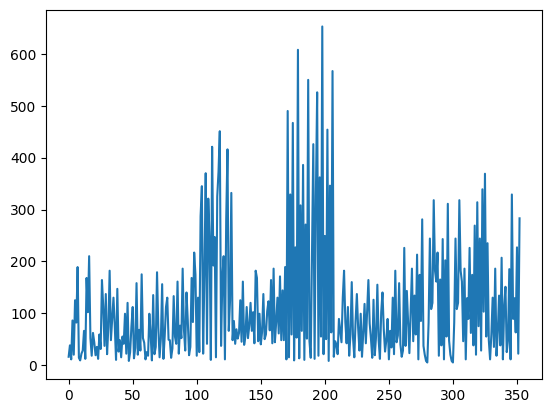

In [11]:
df['expire_in'].plot()

In [12]:
df['category'] = df['expire_in'].apply(handle_threshold_for_expiry)

In [20]:
df[df['category'] == "c5"].value_counts()

id       name                                 expiresAt   price  weight  packagingUnit  available  manufacture_date            date_diff                 expire_in  category
1492837  Tahini (Sesame Seed Paste) 500g      2025-04-30  4.99   500g    Jar            30         2024-09-06 21:20:26.561489  235 days 02:39:33.438511  235        c5          1
6428375  Frozen Haddock Fillets               2025-06-05  8.79   800g    pack           28         2024-09-06 21:20:26.561489  271 days 02:39:33.438511  271        c5          1
5823917  Wheat Flour                          2025-05-08  1.49   1kg     Bag            12         2024-09-06 21:20:26.561489  243 days 02:39:33.438511  243        c5          1
5826375  Rice Cakes                           2025-07-22  1.99   100g    Pack           31         2024-09-06 21:20:26.561489  318 days 02:39:33.438511  318        c5          1
5847392  Cashew Nuts Unsalted 1kg             2024-09-27  9.99   1kg     Bag            14         2024-09-06 21:20

In [14]:
df['name'].value_counts(ascending=False)[:10]

name
Sweet Potatoes                  2
Garlic Bulb                     2
Green Beans                     2
Avocados                        2
Organic Cherry Tomatoes         1
Veal Scaloppine                 1
Chicken Drumsticks (Organic)    1
Pork Tenderloin Medallions      1
Sirloin Steak (Grass-Fed)       1
Applewood Smoked Bacon          1
Name: count, dtype: int64

In [61]:
df['name'].value_counts(ascending=False)[:10]

KeyError: 'available'

In [73]:
top_repeated = df['name'].value_counts(ascending=False)[:10].index

In [79]:
for each in top_repeated:
    print(df[df['name'] == each].sort_values(by='expiresAt'))
    # print(each)

         id            name   expiresAt  price weight packagingUnit  available
1   5728364  Sweet Potatoes  2024-10-15   1.79    1kg           bag         23
46  7654321  Sweet Potatoes  2025-01-05   1.99    1kg           bag         39
         id         name   expiresAt  price weight packagingUnit  available
44  5678901  Garlic Bulb  2024-12-15   0.99   100g          each         51
7   7129384  Garlic Bulb  2025-03-15   0.99   100g          each         78
         id         name   expiresAt  price weight packagingUnit  available
51  3210987  Green Beans  2024-09-20   2.49   250g           bag         21
18  3748291  Green Beans  2024-09-25   2.69   250g           bag         19
         id      name   expiresAt  price weight packagingUnit  available
11  1928379  Avocados  2024-10-05   2.29   200g          each         34
53  5432109  Avocados  2025-02-12   1.89   150g          each         49
        id                     name   expiresAt  price weight packagingUnit  \
0  837629

In [35]:
main_gps  = 49.4873357297657, 8.466263441912194
a1 = 49.46714125585514, 8.481209709068896
a2 = 49.546064226685544, 8.441416765251992
a3  = 49.51673542357937, 8.353278664116408
a4 = 49.45735006577803, 8.422489683636131


In [3]:

from dotenv import load_dotenv
import os
from together import Together

load_dotenv()

product_name = 'eggs'
product_quantity = 10
TOGETHER_API = os.getenv('TOGETHER_API')
client = Together(api_key=TOGETHER_API)

response = client.chat.completions.create(
    model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
    messages=[
        {
                "role": "user",
                "content": f"Assume you are a Chief. I have {product_quantity} of {product_name}. I want all the products that could be done"
        },
],
    max_tokens=6342,
    temperature=0.7,
    top_p=0.7,
    top_k=50,
    repetition_penalty=1,
    stop=["<|eot_id|>","<|eom_id|>"],
    stream=True
)

In [4]:
all_text = str().join([chunk.choices[0].text for chunk in response])
print(all_text)

My friend, I'm happy to help you with that. As your Chief, I've come up with a list of various products that can be made using 10 eggs. Here are some ideas:

**Baked Goods**

1. **Cakes**: 2-3 cakes, depending on the size and recipe (e.g., vanilla, chocolate, or red velvet)
2. **Muffins**: 6-8 muffins (e.g., blueberry, banana, or cinnamon)
3. **Cookies**: 2-3 dozen cookies (e.g., chocolate chip, oatmeal raisin, or peanut butter)
4. **Scones**: 6-8 scones (e.g., plain, cheddar, or fruit-filled)
5. **Bread**: 1-2 loaves of bread (e.g., white, whole wheat, or sourdough)

**Desserts**

1. **Ice Cream**: 1-2 quarts of ice cream (e.g., vanilla, chocolate, or strawberry)
2. **Custard**: 2-3 cups of custard (e.g., vanilla, chocolate, or fruit-flavored)
3. **Pudding**: 2-3 cups of pudding (e.g., chocolate, vanilla, or butterscotch)
4. **Fruit Tarts**: 6-8 fruit tarts (e.g., strawberry, blueberry, or raspberry)
5. **Egg Custard Pie**: 1-2 pies (e.g., classic or chocolate)

**Breakfast and Brunch

Distance between locations: 2.49 km


In [2]:
import requests
import random

import pandas as pd

url = "https://hackathon-products-api.apps.01.cf.eu01.stackit.cloud/api/articles"
response = requests.get(url)
data = response.json()
import pandas as pd
df = pd.DataFrame(data)
df['expiresAt'] = pd.to_datetime(df['expiresAt'])
import datetime
df['manufacture_date'] = pd.Timestamp.now()
df['date_diff'] = df['expiresAt'] - df['manufacture_date']
df['expire_in'] = df['date_diff'].dt.days
def handle_threshold_for_expiry(date):
    if date < 20:
        return 'c1'
    elif date > 20 and date < 100:
        return 'c2'

    elif date > 100 and date < 150:
        return 'c3'
    
    elif date > 150 and date < 225:
        return 'c4'
    else:
        return 'c5'
    
df['demand'] = df['available'].apply(lambda x:   int(x *  random.uniform(0.8, 1.2))  )
df['store_id'] =  1


# Initialize a list to store all new records
all_new_data = []

# Loop over the store IDs
for store in [2, 3, 4, 5]:
    # Loop over each unique 'id'
    for each in df['id'].unique():
        # Select the record where 'id' matches
        record_value = df[df['id'] == each].copy() 
        
        random_available = random.uniform(0, 1.3)
        random_demand = random.uniform(0.8, 1.2)
        new_available = int(record_value['available'].values[0] * random_available)  
        demand = int(record_value['available'].values[0] * random_demand)  
        
        # Update 'available' and 'store_id' values
        record_value['available'] = new_available
        record_value['store_id'] = store
        record_value['demand']  = demand
        
        # Append the modified record to the list
        all_new_data.append(record_value)

# Concatenate all new records into a single DataFrame
new_df = pd.concat(all_new_data, ignore_index=True)

# Optionally, combine the original df with the new_df
final_df = pd.concat([df, new_df], ignore_index=True)

print(final_df)

# final_df.to_csv('updated.csv',index=False)

           id                         name  expiresAt  price weight  \
0     8376291      Organic Cherry Tomatoes 2024-09-23   2.99   250g   
1     5728364               Sweet Potatoes 2024-10-15   1.79    1kg   
2     9126483             Broccoli Florets 2024-09-18   2.49   400g   
3     4537281             Red Bell Peppers 2024-12-02   1.29   500g   
4     1928374                 Baby Spinach 2024-09-27   3.99   150g   
...       ...                          ...        ...    ...    ...   
1760  1728391       Mung Beans, Whole, 1kg 2025-01-14   4.99    1kg   
1761  6283742      Fava Beans, Dried, 250g 2024-11-09   2.29   250g   
1762  3847292  Adzuki Beans, Organic, 500g 2025-04-22   3.79   500g   
1763  5928372        Soybeans, Yellow, 1kg 2024-09-29   3.29    1kg   
1764  8374627    White Beans, Canned, 400g 2025-06-17   1.19   400g   

     packagingUnit  available           manufacture_date  \
0           punnet         48 2024-09-07 04:23:30.001352   
1              bag         

In [7]:
final_df.shape

(1765, 12)

In [3]:

from dotenv import load_dotenv
import os
from together import Together

load_dotenv()
import math

def handle_get_kilometer_from_gps(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

# distance = handle_get_kilometer_from_gps(float(main_gps[0]), float(main_gps[1]), float(a1[0]), float(a1[1]))
# print(f"Distance between locations: {distance:.2f} km")





def find_the_product_recommendation(product_name: str = '', product_quantity: int = ''):
    """
    """
    TOGETHER_API = os.getenv('TOGETHER_API')


    client = Together(api_key=TOGETHER_API)

    response = client.chat.completions.create(
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        messages=[
            {
                    "role": "user",
                    "content": f"Assume you are a Chief. I have {product_quantity} of {product_name}. I want all the products that could be done"
            },
    ],
        max_tokens=6342,
        temperature=0.7,
        top_p=0.7,
        top_k=50,
        repetition_penalty=1,
        stop=["<|eot_id|>","<|eom_id|>"],
        stream=True
    )
    all_text = str().join([chunk.choices[0].text for chunk in response])
    return all_text

In [9]:
import pandas as pd
current_store_id = 1
product_id = 8376291
store_from_model = [2, 4, 5, 3] 
main_gps  = 49.4873357297657, 8.466263441912194
a2 = 49.46714125585514, 8.481209709068896
a3 = 49.546064226685544, 8.441416765251992
a4  = 49.51673542357937, 8.353278664116408
a5 = 49.45735006577803, 8.422489683636131


demand = [[],[]]
def get_balance_model():
    df = pd.read_csv('updated.csv', index_col=False)
    print(df.shape)
    required_demand = df[(df['store_id'] == current_store_id) & (df['id'] == product_id)]['demand'].values[0]
    
    for store in store_from_model:
        if store == 2: gps = a2
        elif store == 3: gps = a3
        elif store == 4: gps = a4
        elif store == 5: gps = a5
        demand_in_store = df[(df['store_id'] == store ) & (df['id'] == product_id)]['demand'].values[0]
        balance_demand = required_demand - demand_in_store
        product_name = df[(df['store_id'] == store ) & (df['id'] == product_id)]['name'].values[0]
        demand[0].append(balance_demand)
        demand[1].append(handle_get_kilometer_from_gps(main_gps[0], main_gps[1],gps[0], gps[1]))
    
    sorted_demand = sorted(demand[0])
    sorted_gps = sorted(demand[1])
    print(sorted_gps)
    for each in sorted_demand:
        required_gps = demand[0].index
        # print(demand[1][required_gps])
        # sorted_list = sorted(demand[1])
        
        print(each)

    
    print(demand)
    print(balance_demand)
    if balance_demand >= 1:
        response = find_the_product_recommendation(product_name, balance_demand)
        print(response)
get_balance_model()



(1765, 12)
[2.4916767527410397, 4.595794317342663, 6.772171981687822, 8.789454777176799]
-14
-10
-10
0
[[-10, -14, -10, 0], [2.4916767527410397, 8.789454777176799, 4.595794317342663, 6.772171981687822]]
0


In [8]:
demand

49